# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [21]:
## The goal of the project is to analyze the data of used car data consisiting the model, manufacturers, fuel type, price, odometer readings, etc.
##Based on the data, a model needs to be created taht will help recommend the client on what the consumers value in the used car.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.compose import ColumnTransformer



In [4]:
df = pd.read_csv('data/vehicles.csv')

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [5]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [6]:
#Check the data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [7]:
df.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [8]:
#checking missing values
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [9]:
df.shape

(426880, 18)

In [23]:
print(df['price'].describe())

count    2.974680e+05
mean     4.283712e+04
std      7.615608e+06
min      1.000000e+00
25%      7.999000e+03
50%      1.690000e+04
75%      2.859000e+04
max      3.736929e+09
Name: price, dtype: float64


In [97]:
lower_limit = df['price'].quantile(0.01)
upper_limit = df['price'].quantile(0.99)
df = df[(df['price'] > lower_limit) & (df['price'] < upper_limit)]

In [98]:
print(df['price'].describe())

count    83564.000000
mean     15979.991264
std       5588.215487
min       7996.000000
25%      10999.000000
50%      14995.000000
75%      19995.000000
max      28499.000000
Name: price, dtype: float64


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [99]:
# drop duplicate rows

df = df.drop_duplicates()
print("\nAfter dropping duplicates:", df.shape)


After dropping duplicates: (83564, 10)


In [100]:
# Fill missing values for categorical variables
fill_values = {
    'paint_color': 'unknown',
    'size': 'unknown',
    'drive': 'unknown',
    'fuel': 'unknown',
    'condition': 'unknown',
    'transmission': 'unknown'
}

df.fillna(value=fill_values, inplace=True)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [101]:
#Keep critical columns only
critical_cols = [
    'price', 'year', 'odometer', 'condition', 'manufacturer',
    'fuel', 'transmission', 'drive', 'type', 'paint_color'
]
df = df[[col for col in critical_cols if col in df.columns]].dropna().copy()

In [102]:
X = df.drop('price', axis=1)
y = df['price']

In [103]:
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)

Categorical columns: ['condition', 'manufacturer', 'fuel', 'transmission', 'drive', 'type', 'paint_color']
Numeric columns: ['year', 'odometer']


In [104]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [105]:
regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regression_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['condition', 'manufacturer',
                                                   'fuel', 'transmission',
                                                   'drive', 'type',
                                                   'paint_color'])])),
                ('model', LinearRegression())])

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [107]:
y_pred = regression_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n✅ Regression model fitted successfully!")
print("Root Mean Squared Error (price):", rmse)



✅ Regression model fitted successfully!
Root Mean Squared Error (price): 4967.820228520322


In [108]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # in %

print("\n--- Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:,.2f}%")


--- Model Evaluation ---
Mean Squared Error (MSE): 24,679,237.82
Root Mean Squared Error (RMSE): 4,967.82
Mean Absolute Error (MAE): 3,978.91
Mean Absolute Percentage Error (MAPE): 27.97%


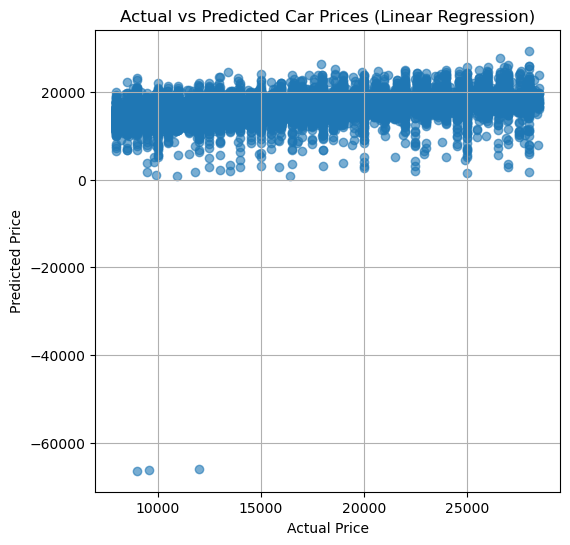

In [109]:
#Plot Actual vs Predicted Prices
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices (Linear Regression)")
plt.grid(True)
plt.show()

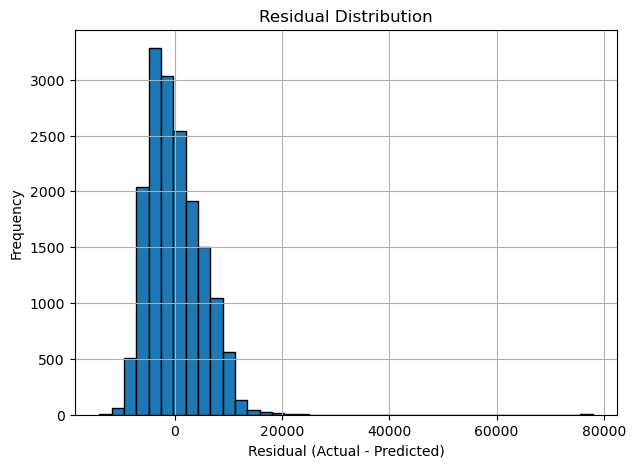

In [110]:
#Residual distribution
residuals = y_test - y_pred
plt.figure(figsize=(7,5))
plt.hist(residuals, bins=40, edgecolor='black')
plt.title("Residual Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [111]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()['price'].sort_values(ascending=False)
print("\n--- Correlation of features with Price ---")
print(corr)


--- Correlation of features with Price ---
price       1.000000
year        0.200862
odometer   -0.159063
Name: price, dtype: float64


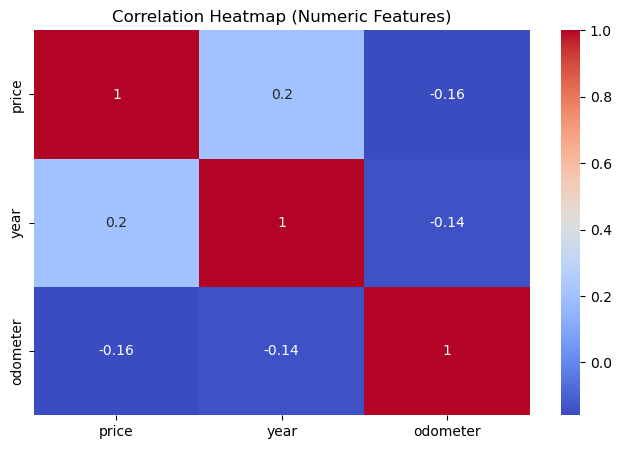

In [112]:
# Visual heatmap
plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

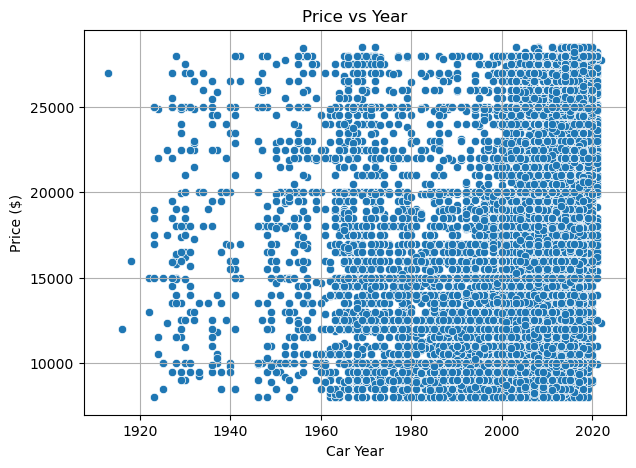

In [113]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='year', y='price', data=df)
plt.title("Price vs Year")
plt.xlabel("Car Year")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

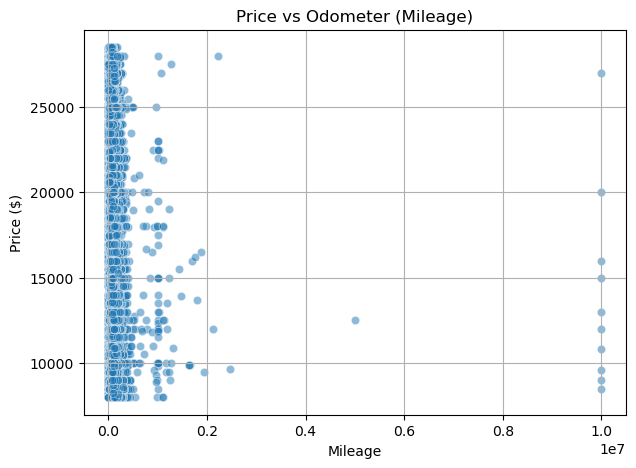

In [114]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='odometer', y='price', data=df, alpha=0.5)
plt.title("Price vs Odometer (Mileage)")
plt.xlabel("Mileage")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

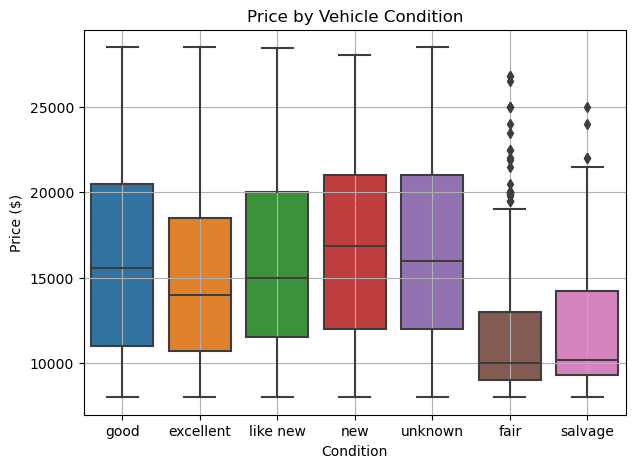

In [115]:
plt.figure(figsize=(7,5))
sns.boxplot(x='condition', y='price', data=df)
plt.title("Price by Vehicle Condition")
plt.xlabel("Condition")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

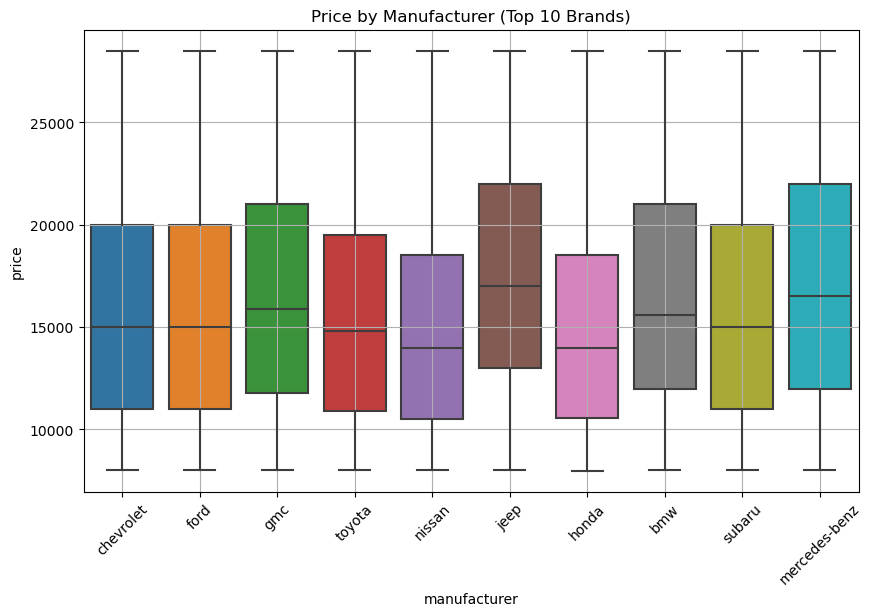

In [116]:
top_brands = df['manufacturer'].value_counts().head(10).index
plt.figure(figsize=(10,6))
sns.boxplot(x='manufacturer', y='price', data=df[df['manufacturer'].isin(top_brands)])
plt.title("Price by Manufacturer (Top 10 Brands)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

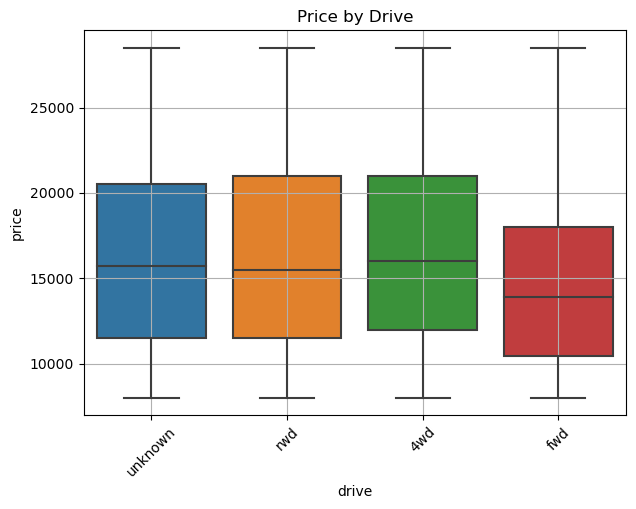

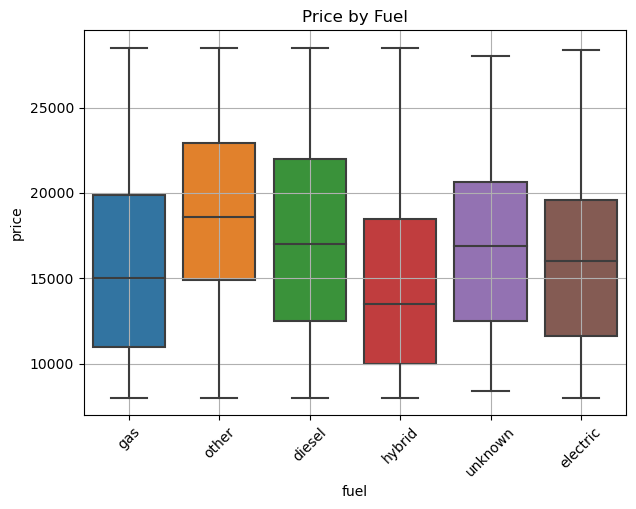

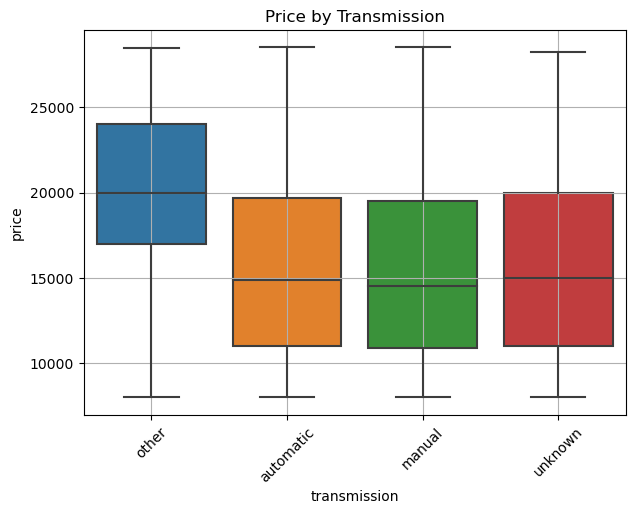

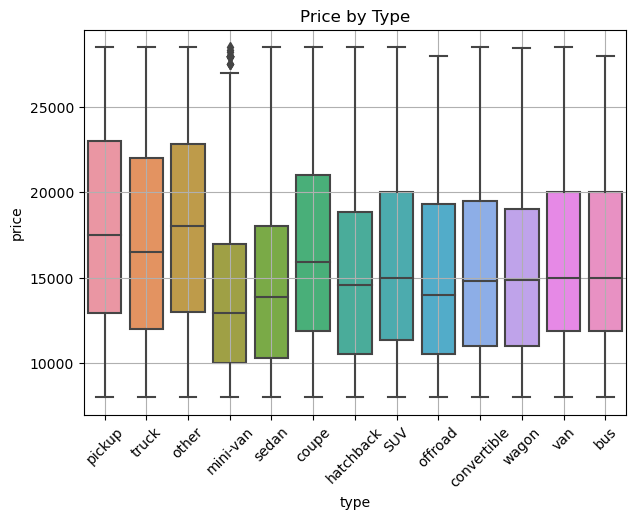

In [117]:
for col in ['drive', 'fuel', 'transmission', 'type']:
    plt.figure(figsize=(7,5))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f"Price by {col.capitalize()}")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [120]:
print("Summary of Findings")
print("Newer model years command higher prices, confirming clear depreciation with age.")
print("Mileage (odometer) shows a strong negative relationship with price — cars lose value rapidly at lower mileage and then more slowly.")
print("Condition has a major categorical impact: “excellent” cars are priced much higher than “fair” or “poor” ones.")
print("Brand matters: luxury makes (BMW, Lexus, Cadillac) have the highest median prices, while mainstream brands (Nissan, Ford, Hyundai) occupy lower ranges.")
print("Drive type: AWD/4WD vehicles are generally priced higher than FWD and RWD models, especially valuable in colder regions.")
print("Fuel type: hybrid and electric cars show price premiums over gasoline or diesel vehicles.")
print("Transmission: automatic cars consistently sell for more than manual ones.")
print("Vehicle type: SUVs and trucks lead in resale value, followed by sedans and coupes.")
print("Overall Insight: car prices are primarily driven by year, mileage, condition, brand, and vehicle type, with supporting influence from drive, fuel, and transmission — aligning with real-world resale trends.")
    

Summary of Findings
Newer model years command higher prices, confirming clear depreciation with age.
Mileage (odometer) shows a strong negative relationship with price — cars lose value rapidly at lower mileage and then more slowly.
Condition has a major categorical impact: “excellent” cars are priced much higher than “fair” or “poor” ones.
Brand matters: luxury makes (BMW, Lexus, Cadillac) have the highest median prices, while mainstream brands (Nissan, Ford, Hyundai) occupy lower ranges.
Drive type: AWD/4WD vehicles are generally priced higher than FWD and RWD models, especially valuable in colder regions.
Fuel type: hybrid and electric cars show price premiums over gasoline or diesel vehicles.
Transmission: automatic cars consistently sell for more than manual ones.
Vehicle type: SUVs and trucks lead in resale value, followed by sedans and coupes.
Overall Insight: car prices are primarily driven by year, mileage, condition, brand, and vehicle type, with supporting influence from dri